In [90]:
### №1 Section for importing main libraries and defining main function

In [91]:
import os
import numpy as np
import matplotlib.pyplot as plt
import statistics

def plot2figs(image1, image2):
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.imshow(image1, cmap=plt.cm.gray)
    plt.title('Original image')
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.imshow(image2, cmap=plt.cm.gray)
    plt.title('Modified image')
    plt.show()

In [92]:
### №2 Section for loading image
from PIL import Image
image = Image.open(os.path.join('bin_data', 'collagen.png'))
sizes), np.log(boxes_number), 1)[0]
    return results


In [93]:
### №3 Section for HOG visualization

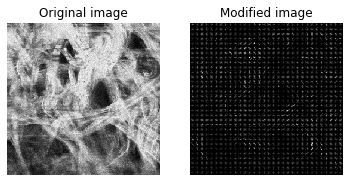

In [94]:
from skimage.feature import hog

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8),
                        cells_per_block=(1, 1), visualize=True)
plot2figs(image, hog_image)

In [95]:
### №4 Section for SOBEL visualization

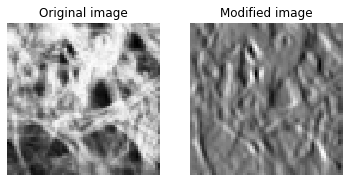

In [96]:
from scipy import ndimage, misc
from skimage.transform import rescale
rescaled = rescale(image, 0.25)
sobel_img = ndimage.sobel(rescaled)
plot2figs(rescaled, sobel_img)

In [97]:
### №5 Section for prewitt visualization

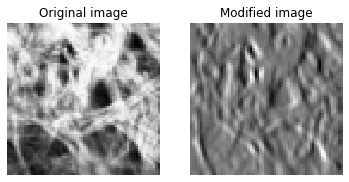

In [98]:
from scipy.ndimage import prewitt
prewitt_img = prewitt(rescaled)
plot2figs(rescaled, prewitt_img)

In [99]:
### №6 Section for canny visualization

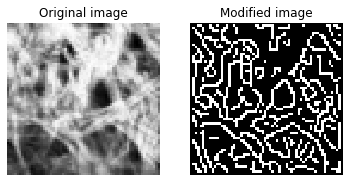

In [100]:
from skimage.feature import canny
edges = canny(rescaled)
plot2figs(rescaled, edges)

In [101]:
### №7 Section for log visualization

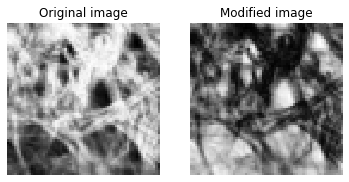

In [102]:
from scipy.ndimage import gaussian_laplace as log
log_image = log(rescaled, .1)
plot2figs(rescaled, log_image)

In [103]:
### №8 Section for morphology visualization

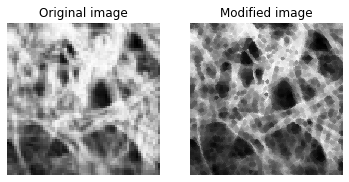

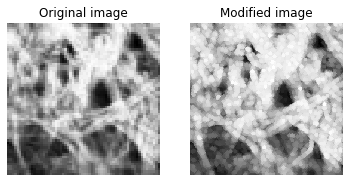

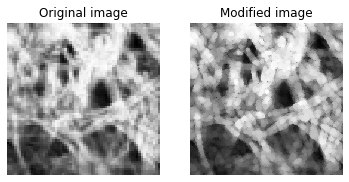

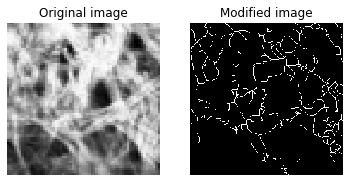

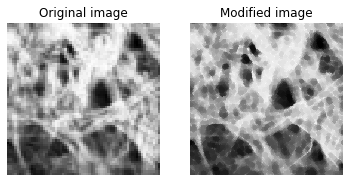

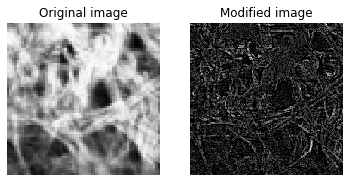

In [104]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import disk, skeletonize

selem = disk(3)
eroded = erosion(image, selem)
plot2figs(rescaled, eroded)
dilated = dilation(image, selem)
plot2figs(rescaled, dilated)
opened = opening(image, selem)
plot2figs(rescaled, opened)
skeletonized = skeletonize(opened > 128)
plot2figs(rescaled, skeletonized)
closed = closing(image, selem)
plot2figs(rescaled, closed)
wt = white_tophat(image, selem)
plot2figs(rescaled, wt)

In [105]:
### №9 Section for First-order statistics (FOS)

In [106]:
print('Mean value for image: ', np.mean(image))
print('STD value for image: ', np.std(image))
print('Median value of data: ', statistics.median(image.flatten()))
print('Harmonic mean value of data: ', statistics.harmonic_mean(image.flatten()))

Mean value for image:  139.29812622070312
STD value for image:  57.48243394771488
Median value of data:  17.0
Harmonic mean value of data:  0.0


In [107]:
### №10 Section for Gray-Level Co-Occurrence Matrix (GLCM)

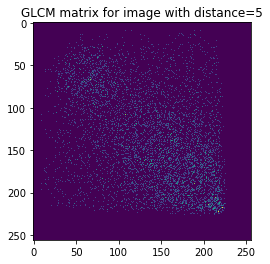

In [108]:
from skimage.feature import greycomatrix
glcm = greycomatrix((rescaled*256).astype(np.int32), distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
plt.imshow(glcm[0:256,0:256,0,0])
plt.title('GLCM matrix for image with distance=5')
plt.show()

In [109]:
### №11 Section for CNN feature extraction

(224, 224, 3)


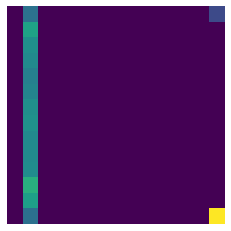

In [139]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential, load_model
from skimage.transform import resize
from tensorflow.keras.preprocessing import image as lb
from tensorflow.keras.applications.vgg16 import preprocess_input

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

target_size=(224, 224)

print(img.shape)
image = Image.open(os.path.join('bin_data', 'collagen_color.png'))
image = np.asarray(image)
img = resize(image, target_size)
x = lb.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_tensor = preprocess_input(x)

block4_pool_features = model.predict(img_tensor)
plt.imshow(block4_pool_features[0, :, :, 9], cmap='viridis')
plt.axis('off')
plt.show()

In [ ]:
### №12 Section for fractal dimention

In [145]:
def box_counter(image, k):
    S = np.add.reduceat(
        np.add.reduceat(image, np.arange(0, image.shape[0], k), axis=0),
                               np.arange(0, image.shape[1], k), axis=1)
    return len(np.where((S > 0) & (S < k**2))[0])

def fractal_dimension(image, threshold=0.7):
    assert(len(image.shape) == 2)
    # Binarization
    image = (image < threshold)
    # Calculating greatest power of 2
    n = 2**np.floor(np.log(min(image.shape))/np.log(2))
    # Calculating size
    sizes = 2**np.arange(int(np.log(n)/np.log(2)), 1, -1)
    # Box counting using iteration by all sizes
    boxes_number = []
    [boxes_number.append(box_counter(image, size)) for size in sizes]
    # Formula for Minkowski dimention
    results = -np.polyfit(np.log(sizes), np.log(boxes_number), 1)[0]
    return results

image = Image.open(os.path.join('bin_data', 'collagen.png'))
image = np.asarray(image)
rescaled = rescale(image, 0.75)
print('Fractal dimention is ', fractal_dimension(rescaled))


Fractal dimention is  1.646830818129848


In [163]:
### №13 feature extraction example for implementation algorithm Bag of Words #BOW

(3, 3, 104)


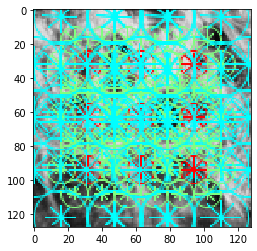

In [164]:
from skimage.feature import daisy
#The DAISY local image descriptor is based on gradient orientation histograms similar to the SIFT descriptor. It is formulated in a way that allows for fast dense extraction which is useful for e.g. bag-of-features image representations.
#In this example a limited number of DAISY descriptors are extracted at a large scale for illustrative purposes.

def features_extraction(image):
    descs, descs_img = daisy(image, step=31, radius=32, rings=2, histograms=6,  orientations=8, visualize=True)
    return descs, descs_img

image = Image.open(os.path.join('bin_data', 'collagen.png'))
image = np.asarray(image)
rescaled = rescale(image, 0.5)
desc, img = gen_features(rescaled)
print(desc.shape)
plt.imshow(img)
plt.show()